In [55]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

family = pd.read_csv('family.csv')
display(family.head())

,income,food,bread,rice,meat,restaurant,housing,source
0,84.109,52.968,24459,22253,4432,1080,8.772,Entrepreneurial Activities
1,78.893,51.702,21972,17700,4195,3944,7.200,Entrepreneurial Activities
2,135.580,76.210,28425,16833,980,0,12.180,Entrepreneurial Activities
3,512.302,124.531,21028,18096,15194,78220,43.380,Wage/Salaries
4,75.287,29.874,10721,7810,3468,1200,27.276,Entrepreneurial Activities


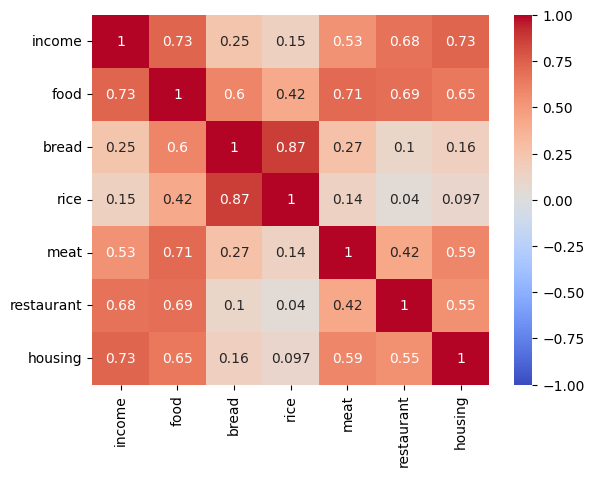

In [56]:
# Create heat map of correlation
corr_grid = family.corr(numeric_only=True)
sns.heatmap(corr_grid, xticklabels=corr_grid.columns, yticklabels=corr_grid.columns, center=0, cmap='coolwarm', vmin=-1, vmax=1, annot=True)
plt.show()

In [57]:
# Fit model and view summary
model = sm.OLS.from_formula('income ~ source + food + housing', data=family)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     134.3
Date:                Thu, 15 May 2025   Prob (F-statistic):           2.56e-48
Time:                        10:48:34   Log-Likelihood:                -1221.9
No. Observations:                 211   AIC:                             2452.
Df Residuals:                     207   BIC:                             2465.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [58]:
# Regression equation
b0, b1, b2, b3 = results.params
display(f"Regression equation: income = {b0:.2f} + {b1:.2f} * source + {b2:.2f} * food + {b3:.2f} * housing")


'Regression equation: income = -26.81 + 29.70 * source + 1.53 * food + 3.19 * housing'

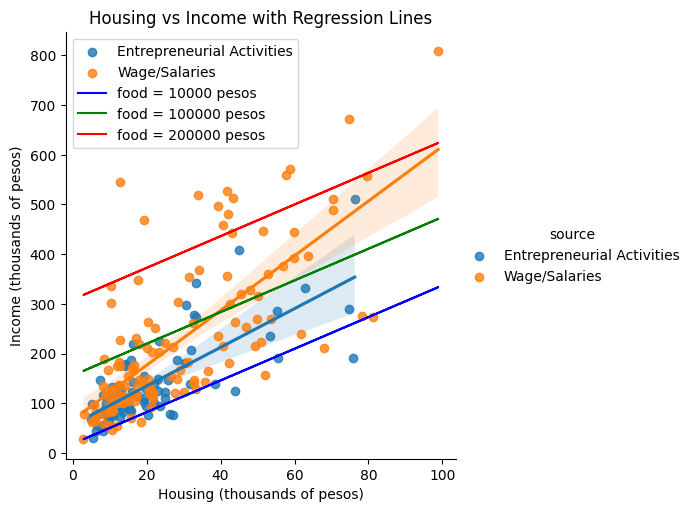

In [59]:
# Create scatter plot
sns.lmplot(data=family, x='housing', y='income', hue='source')

# Add regression lines for different food expenditure values
for food_value, color in zip([10, 100, 200], ['blue', 'green', 'red']):
    income_values = b0 + b1 * 1 + b2 * food_value + b3 * family['housing']
    plt.plot(family['housing'], income_values, label=f'food = {food_value * 1000} pesos', color=color)

# Add labels, legend, and title
plt.xlabel('Housing (thousands of pesos)')
plt.ylabel('Income (thousands of pesos)')
plt.title('Housing vs Income with Regression Lines')
plt.legend()
plt.show()